In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [41]:
import warnings
warnings.simplefilter('ignore')

# Linear Regression

In [42]:
x = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([5,20,14,32,22,38])

In [43]:
model = LinearRegression()
model = LinearRegression().fit(x,y)

In [44]:
# get result
r_sq = model.score(x,y)
print('coefficient of determinator:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determinator: 0.7158756137479542
intercept: 5.633333333333329
slope: [0.54]


In [45]:
# predict response
y_pred = model.predict(x)
print("predict response:",y_pred,sep='\n')

y_pred = model.intercept_ + model.coef_ * x
print("predict response:",y_pred,sep='\n')

predict response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
predict response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [46]:
x_new = np.arange(5).reshape((-1,1))
print(x_new)

y_new = model.predict(x_new)
print(y_new)

[[0]
 [1]
 [2]
 [3]
 [4]]
[5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


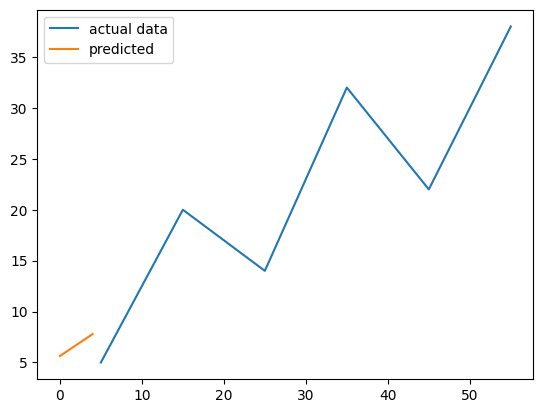

In [47]:
# display in plot
plt.plot(x,y,label="actual data")
plt.plot(x_new,y_new, label = "predicted")
plt.legend()
plt.show()

# multiple linear regression

In [48]:
x = [[0,1],[5,1],[15,2],[15,5],[35,11],[45,15],[55,34],[60,35]]
y = [4,5,20,14,32,22,38,43]

In [49]:
model = LinearRegression().fit(x,y)

In [50]:
# predict response
y_pred = model.predict(x)
print("predict response:",y_pred,sep='\n')

y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print("predict response:",y_pred,sep='\n')

x_new = [[0,1],[5,1],[15,2],[35,11],[45,15],[55,34],[60,35]]
y_new = model.predict(x_new)

predict response:
[ 5.87953117  8.48130213 13.80236787 14.15493932 25.26716607 30.94080326
 38.3772977  41.09659248]
predict response:
[ 5.87953117  8.48130213 13.80236787 14.15493932 25.26716607 30.94080326
 38.3772977  41.09659248]


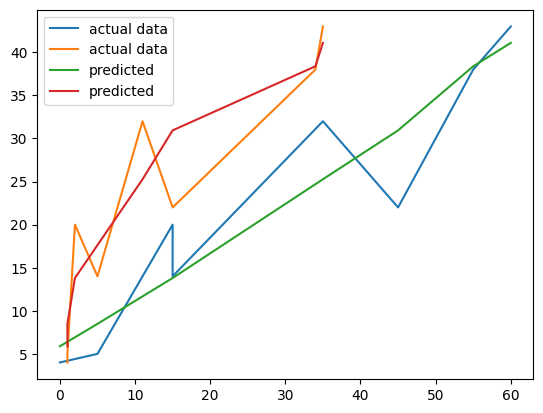

In [51]:
# display in plot
plt.plot(x,y,label="actual data")
plt.plot(x_new,y_new, label = "predicted")
plt.legend()
plt.show()

# Polynomial regression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [53]:
x = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([15,11,2,8,25,32])

In [54]:
# transform inout data
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_ = transformer.transform(x)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [55]:
# create model and fit
model = LinearRegression().fit(x_,y)

In [56]:
# get the result
r_sq = model.score(x_,y)
intercept, coefficients = model.intercept_ , model.coef_

In [57]:
# predict
y_pred = model.predict(x_)

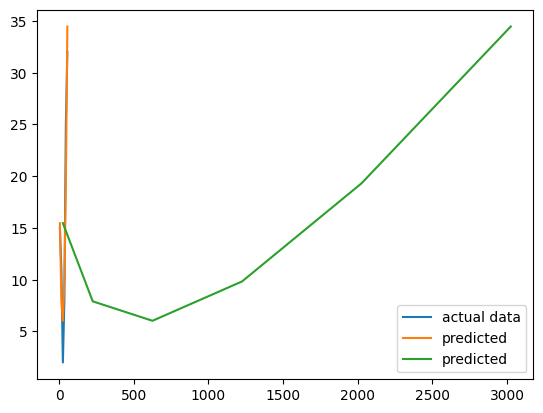

In [58]:
# display in plot
plt.plot(x,y,label="actual data")
plt.plot(x_,y_pred, label = "predicted")
plt.legend()
plt.show()

# advance linear regression

In [59]:
import statsmodels.api as sm

In [60]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x),np.array(y)
x = sm.add_constant(x)

In [61]:
model = sm.OLS(y, x)
results = model.fit()

In [62]:
print(results.summary())
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Tue, 17 Jan 2023   Prob (F-statistic):            0.00713
Time:                        15:11:31   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

In [63]:
print('predicted response:', results.fittedvalues, sep='\n')
print('predicted response:', results.predict(x), sep='\n')
x_new = sm.add_constant(np.arange(10).reshape(-1, 2))
print(x_new)
y_new = results.predict(x_new)
print(y_new)

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


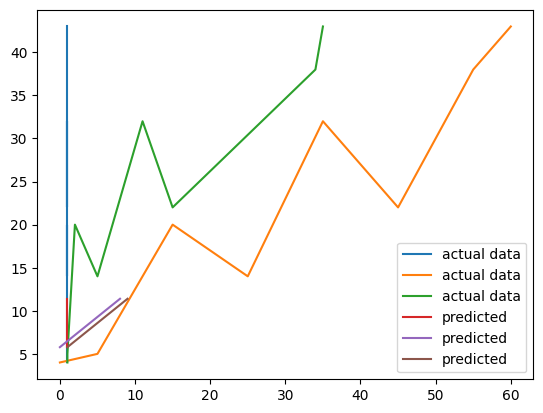

In [64]:
# display in plot
plt.plot(x,y,label="actual data")
plt.plot(x_new, y_new, label = "predicted")
plt.legend()
plt.show()

# Fish data 

## Linear Regression

### Water Temp

In [65]:
fish = pd.read_csv("fishdata1.csv")
fish

,S.No,Year,Month,Day,Hour,Minute,Second,PM1,PM2.5,PM10,Temp,Humidity,Light,CO,Water Temp,pH
0,1,2019,11,26,10,27,20,8.0,12,14,25,91,34.0,95.0,24.63,6.52
1,2,2019,11,26,10,28,12,9.0,12,15,25,91,34.0,95.0,24.63,6.59
2,3,2019,11,26,10,29,4,10.0,14,15,26,89,34.0,95.0,24.63,6.53
3,4,2019,11,26,10,29,56,8.0,12,12,26,90,34.0,95.0,24.56,6.59
4,5,2019,11,26,10,30,43,9.0,12,15,26,91,34.0,95.0,24.56,6.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23531,23532,2019,12,10,8,8,23,18.0,27,28,45,-13,35.0,95.0,27.06,6.34
23532,23533,2019,12,10,8,9,9,19.0,33,48,47,9,35.0,95.0,27.06,6.35
23533,23534,2019,12,10,8,9,57,22.0,30,34,47,8,35.0,95.0,27.06,6.34
23534,23535,2019,12,10,8,10,49,21.0,35,47,51,6,34.0,95.0,27.06,6.38


In [66]:
fish['Water Temp'].describe()

count     23456.000000
mean       1049.335440
std       15747.166497
min           6.250000
25%          24.810000
50%          26.130000
75%          27.190000
max      292019.000000
Name: Water Temp, dtype: float64

In [67]:
df = fish.dropna()
# Clean Water temp
df_fish = df[(df['Water Temp']>0) & (df['Water Temp']<30) & (df['Water Temp']>20)]

In [68]:
df_fish['Water Temp'].describe()

count    22411.000000
mean        26.129634
std          1.649557
min         22.201900
25%         24.880000
50%         26.190000
75%         27.190000
max         29.630000
Name: Water Temp, dtype: float64

In [69]:
X = df_fish['S.No'].values.reshape((-1,1))
y_water_linear = df_fish['Water Temp']

In [70]:
len(df_fish)

22411

In [71]:
model = LinearRegression()
model = LinearRegression().fit(X,y_water_linear)

In [72]:
# get result
r_sq = model.score(X,y_water_linear)
print('coefficient of determinator:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determinator: 0.006995497887939406
intercept: 26.368931339727524
slope: [-2.03662571e-05]


In [73]:
# predict response
y_pred_water_linear = model.predict(X)
print("predict response:",y_pred,sep='\n')

y_pred_water_linear = model.intercept_ + model.coef_ * x
print("predict response:",y_pred,sep='\n')

predict response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]
predict response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


In [74]:
x_new_water_linear = np.arange(22411).reshape((-1,1))
y_pred_water_linear = model.predict(x_new_water_linear)
print(y_pred_water_linear)

[26.36893134 26.36891097 26.36889061 ... 25.91256425 25.91254388
 25.91252352]


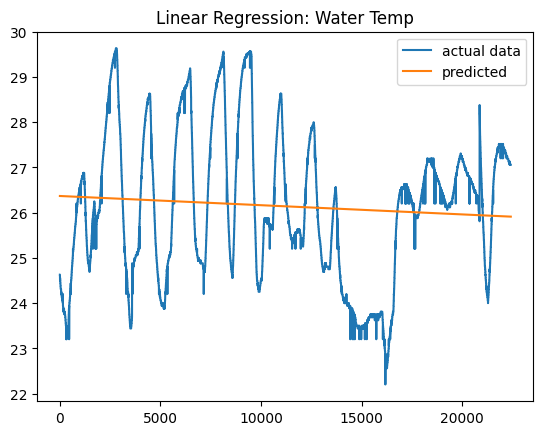

In [75]:
# display in plot
plt.plot(x_new_water_linear,y_water_linear, label="actual data")
plt.plot(y_pred_water_linear, label = "predicted")
plt.legend()
plt.title("Linear Regression: Water Temp")
plt.show()

### Humidity

In [76]:
# Clean humidity
df_new = pd.read_csv("fishdata1.csv")
df_new = df_new.drop_duplicates()
df_new = df_new.dropna()
df_new_humid = df_new[(df_new['Humidity']>0) & (df_new['Humidity']<50)]

In [77]:
df_new_len = len(df_new_humid)

In [78]:
X = df_new_humid['S.No'].values.reshape((-1,1))
y_linear_humid = df_new_humid['Humidity']

In [79]:
model = LinearRegression()
model = LinearRegression().fit(X,y_linear_humid)

In [80]:
# get result
r_sq = model.score(X,y_linear_humid)
print('coefficient of determinator:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determinator: 0.23303701541723154
intercept: 10.854111964301783
slope: [-0.00026726]


In [81]:
# predict response
y_pred = model.predict(X)
print("predict response:",y_pred,sep='\n')

y_pred = model.intercept_ + model.coef_ * x
print("predict response:",y_pred,sep='\n')

predict response:
[10.80466929 10.80440203 10.80413477 ...  4.5644691   4.56420184
  4.56393459]
predict response:
[[10.85384471 10.85411196 10.85384471]
 [10.85384471 10.85277568 10.85384471]
 [10.85384471 10.8501031  10.85357745]
 [10.85384471 10.84743052 10.85277568]
 [10.85384471 10.84475794 10.85117213]
 [10.85384471 10.84208537 10.8501031 ]
 [10.85384471 10.83941279 10.8450252 ]
 [10.85384471 10.8380765  10.84475794]]


In [82]:
x_new_linear_humid = np.arange(df_new_len).reshape((-1,1))
y_pred_linear_humid = model.predict(x_new_linear_humid)
print(y_pred)

[[10.85384471 10.85411196 10.85384471]
 [10.85384471 10.85277568 10.85384471]
 [10.85384471 10.8501031  10.85357745]
 [10.85384471 10.84743052 10.85277568]
 [10.85384471 10.84475794 10.85117213]
 [10.85384471 10.84208537 10.8501031 ]
 [10.85384471 10.83941279 10.8450252 ]
 [10.85384471 10.8380765  10.84475794]]


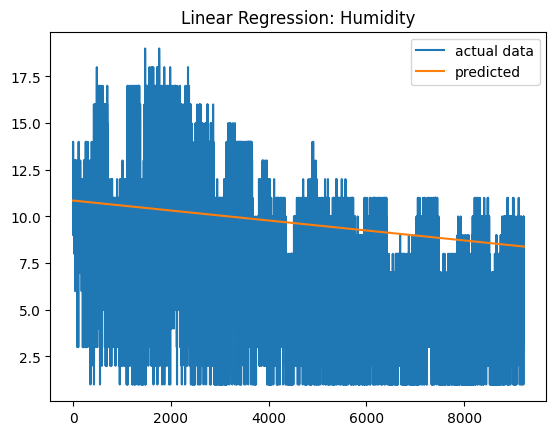

In [83]:
# display in plot
plt.plot(x_new_linear_humid,y_linear_humid, label="actual data")
plt.plot(y_pred_linear_humid, label = "predicted")
plt.legend()
plt.title("Linear Regression: Humidity")
plt.show()

## Multiple Linear Regression

### Water Temp

In [84]:
df2 = pd.read_csv("fishdata1.csv")
df2 = df2.drop_duplicates()
df2 = df2.dropna()

In [85]:
df2.columns

Index(['S.No', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'PM1',
       'PM2.5', 'PM10', 'Temp', 'Humidity', 'Light', 'CO', 'Water Temp', 'pH'],
      dtype='object')

In [86]:
df2_new = df2[(df2['Water Temp']>0) & (df2['Water Temp']<30) & (df2['Water Temp']>20)]

In [87]:
X = df2_new[['S.No', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 
'PM1','PM2.5', 'PM10', 'Temp', 'Humidity', 'Light', 'CO','pH']]
y_multi_water = df2_new['Water Temp']

In [88]:
model = LinearRegression().fit(X,y_multi_water)

In [89]:
# predict response
y_pred_multi_water = model.predict(X)
print("predict response:",y_pred,sep='\n')

y_pred_multi_water = model.intercept_ + np.sum(model.coef_ * X, axis=1)
print("predict response:",y_pred,sep='\n')

predict response:
[[10.85384471 10.85411196 10.85384471]
 [10.85384471 10.85277568 10.85384471]
 [10.85384471 10.8501031  10.85357745]
 [10.85384471 10.84743052 10.85277568]
 [10.85384471 10.84475794 10.85117213]
 [10.85384471 10.84208537 10.8501031 ]
 [10.85384471 10.83941279 10.8450252 ]
 [10.85384471 10.8380765  10.84475794]]
predict response:
[[10.85384471 10.85411196 10.85384471]
 [10.85384471 10.85277568 10.85384471]
 [10.85384471 10.8501031  10.85357745]
 [10.85384471 10.84743052 10.85277568]
 [10.85384471 10.84475794 10.85117213]
 [10.85384471 10.84208537 10.8501031 ]
 [10.85384471 10.83941279 10.8450252 ]
 [10.85384471 10.8380765  10.84475794]]


In [90]:
len(df2_new)

22411

In [91]:
len(y_pred)

8

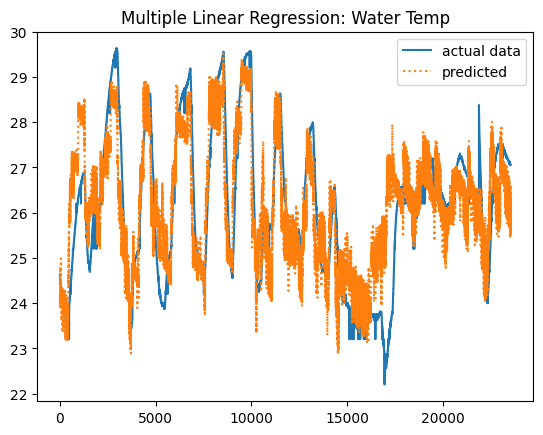

In [92]:
# display in plot
plt.plot(y_multi_water, label="actual data")
plt.plot(y_pred_multi_water, label = "predicted", ls = ':')
plt.legend()
plt.title("Multiple Linear Regression: Water Temp")
plt.show()

### Humidity

In [93]:
df_humid = df2[(df2['Humidity']>0) & (df2['Humidity']<50)]

In [94]:
X = df_humid[['S.No', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'PM1',
       'PM2.5', 'PM10', 'Temp', 'Light', 'CO', 'Water Temp', 'pH']]
y_multi_humid = df_humid['Humidity']

In [95]:
model = LinearRegression().fit(X,y_multi_humid)

In [96]:
# predict response
y_pred_multi_humid = model.predict(X)
print("predict response:",y_pred,sep='\n')

y_pred_multi_humid = model.intercept_ + np.sum(model.coef_ * X, axis=1)
print("predict response:",y_pred,sep='\n')

predict response:
[[10.85384471 10.85411196 10.85384471]
 [10.85384471 10.85277568 10.85384471]
 [10.85384471 10.8501031  10.85357745]
 [10.85384471 10.84743052 10.85277568]
 [10.85384471 10.84475794 10.85117213]
 [10.85384471 10.84208537 10.8501031 ]
 [10.85384471 10.83941279 10.8450252 ]
 [10.85384471 10.8380765  10.84475794]]
predict response:
[[10.85384471 10.85411196 10.85384471]
 [10.85384471 10.85277568 10.85384471]
 [10.85384471 10.8501031  10.85357745]
 [10.85384471 10.84743052 10.85277568]
 [10.85384471 10.84475794 10.85117213]
 [10.85384471 10.84208537 10.8501031 ]
 [10.85384471 10.83941279 10.8450252 ]
 [10.85384471 10.8380765  10.84475794]]


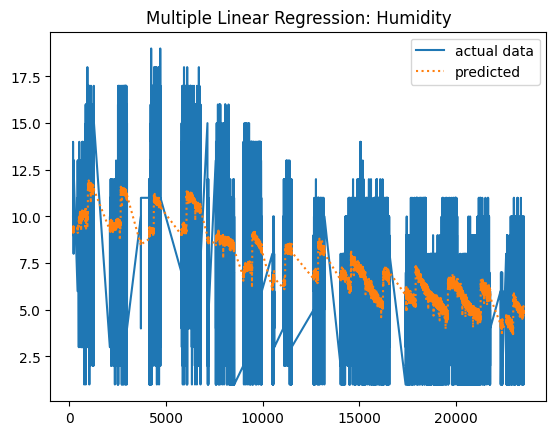

In [97]:
# display in plot
plt.plot(y_multi_humid, label="actual data")
plt.plot(y_pred_multi_humid, label = "predicted", ls = ':')
plt.legend()
plt.title("Multiple Linear Regression: Humidity")
plt.show()

## Visualization Comparison

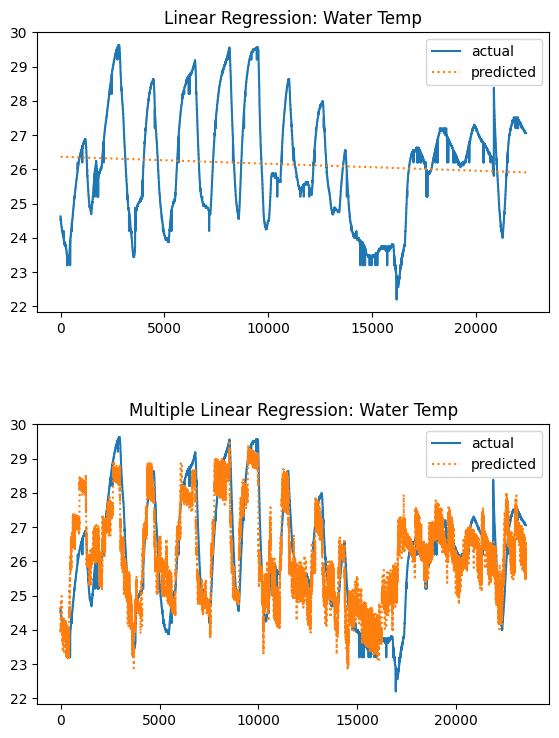

In [98]:
# Water Temp
plt.subplot(2, 1, 1)
plt.plot(x_new_water_linear,y_water_linear, label="actual")
plt.plot(y_pred_water_linear, label = "predicted",ls = ':')
plt.legend()
plt.title("Linear Regression: Water Temp")

plt.subplot(2, 1, 2)
plt.plot(y_multi_water, label="actual")
plt.plot(y_pred_multi_water, label = "predicted", ls = ':')
plt.legend()
plt.title("Multiple Linear Regression: Water Temp")

plt.subplots_adjust(left=0.1,
                    bottom=-0.5, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

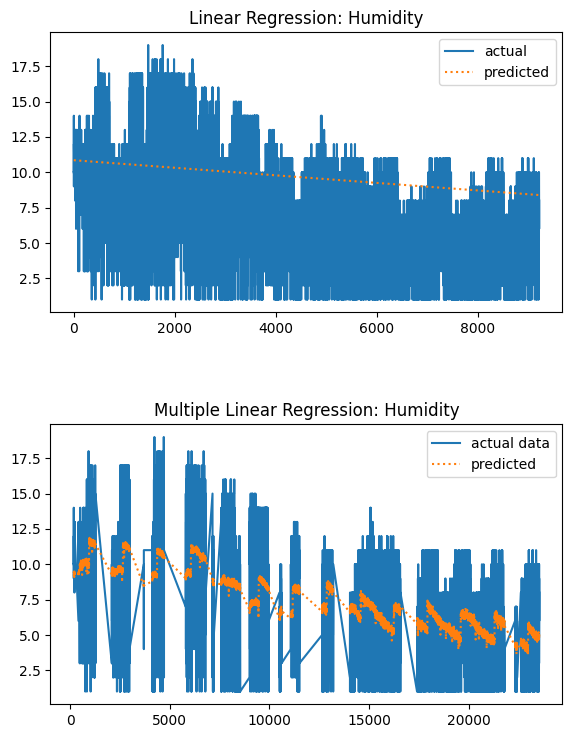

In [99]:
# Water Temp
plt.subplot(2, 1, 1)
plt.plot(x_new_linear_humid,y_linear_humid, label="actual")
plt.plot(y_pred_linear_humid, label = "predicted", ls = ':')
plt.legend()
plt.title("Linear Regression: Humidity")

plt.subplot(2, 1, 2)
plt.plot(y_multi_humid, label="actual data")
plt.plot(y_pred_multi_humid, label = "predicted", ls = ':')
plt.legend()
plt.title("Multiple Linear Regression: Humidity")

plt.subplots_adjust(left=0.1,
                    bottom=-0.5, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()